In [1]:
import Pkg; Pkg.activate(@__DIR__); Pkg.instantiate()

  Activating environment at `/mnt/064AC6424AC62E6D/git_workspace/flyhopper/scripts/Julia/Project.toml`


In [10]:
using LinearAlgebra
using PyPlot
using TrajOptPlots
using MeshCat
using RobotZoo
using StaticArrays

In [11]:
ℓ1 = 1.0
ℓ2 = 1.0
ℓc1 = ℓ1/2
ℓc2 = ℓ2/2
m1 = 1.0
m2 = 1.0
g = 9.81
I1 = m1*(ℓ1^2)
I2 = m2*(ℓ2^2)

function f(x)
    # double pendulum dynamics
    
    q1 = x[1]
    q1̇ = x[2]
    q2 = x[3]
    q2̇ = x[4]
    
    M = zeros(2, 2)
    M[1, 1] = I1 + I2 + m2*ℓ1^2 + 2*m2*ℓ1*ℓc2*cos(q2)
    M[1, 2] = I2 + m2*ℓ1*ℓc2*cos(q2)
    M[2, 1] = I2 + m2*ℓ1*ℓc2*cos(q2)
    M[2, 2] = I2
    
    C = zeros(2, 2)
    C[1, 1] = -2*m2*ℓ1*ℓc2*sin(q2)*q2̇ 
    C[1, 2] = -m2*ℓ1*ℓc2*sin(q2)*q2̇ 
    C[2, 1] = m2*ℓ1*ℓc2*sin(q2)*q1̇
    C[2, 2] = 0
    
    τg = zeros(2)
    τg[1] = -m1*g*ℓc1*sin(q1) - m2*g*(ℓ1*sin(q1) + ℓc2*sin(q1+q2))
    τg[2] = -m2*g*ℓc2*sin(q1+q2)
    q_d = zeros(2)
    q_d[1] = q1̇ 
    q_d[2] = q2̇ 
    q_dd = inv(M)*(τg - C*q_d)
    q1̈  = q_dd[1]
    q2̈  = q_dd[2]
    
    ẋ = zeros(4)
    ẋ[1] = q1̇  # q1 dot
    ẋ[2] = q1̈  # q1 double dot
    ẋ[3] = q2̇  # q2 dot
    ẋ[4] = q2̈  # q2 double dot
    
end

f (generic function with 1 method)

In [12]:
function euler_step(xk)
    xn = xk .+ h*f(xk)
end

euler_step (generic function with 1 method)

In [13]:
function simulate!(xtraj, N)
    for k = 1:(N-1)
        xtraj[:,k+1] .= euler_step(xtraj[:,k])
    end
end

simulate! (generic function with 1 method)

In [14]:
Tf = 10.0
h = 0.001 #20 Hz
N = Int(floor(Tf./h + 1))
thist = h.*Array(0:(N-1));

In [18]:
x0 = [5*(pi/180); 0.0; 0.0; 0.0]
xtraj = zeros(4,N)
xtraj[:,1] = x0;

In [19]:
simulate!(xtraj, N)

In [20]:
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo

vis = Visualizer()
TrajOptPlots.set_mesh!(vis, RobotZoo.Acrobot())
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
│ http://127.0.0.1:8703
└ @ MeshCat /home/ben/.julia/packages/MeshCat/GlCMx/src/visualizer.jl:73


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("meshcat" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("robot" => MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("base" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x72, 0x6f, 0x62, 0x6f, 0x74, 0x2f, 0x62, 0x61, 0x73, 0x65], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "link1" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x6f, 0x62, 0x6f, 0x74, 0x2f, 0x6c, 0x69, 0x6e, 0x6b, 0x31], nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}("joint" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x69, 0x6e, 0x6b, 0x31, 0x2f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x69, 0x6e, 0x6b, 0x31, 0x2f, 0x6a, 0x6f, 0x69, 0x6e, 0x74], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), "link2" => MeshCat.SceneTrees.SceneNode(UInt8[0x83, 0xa6, 0x6f, 0x62, 0x6a, 0x65, 0x63, 0x74, 0x84, 0xaa  …  0x69, 0x6e, 0x6b, 0x31, 0x2f, 0x6c, 0x69, 0x6e, 0x6b, 0x32], UInt8[0x83, 0xa6, 0x6d, 0x61, 0x74, 0x72, 0x69, 0x78, 0xc7, 0x40  …  0x69, 0x6e, 0x6b, 0x31, 0x2f, 0x6c, 0x69, 0x6e, 0x6b, 0x32], Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()))))))))), Set{Any}(), ip"127.0.0.1", 8703))

In [22]:
X1 = [SVector{4}(x) for x in eachcol(xtraj)];
visualize!(vis, RobotZoo.Acrobot(), thist[end], X1)

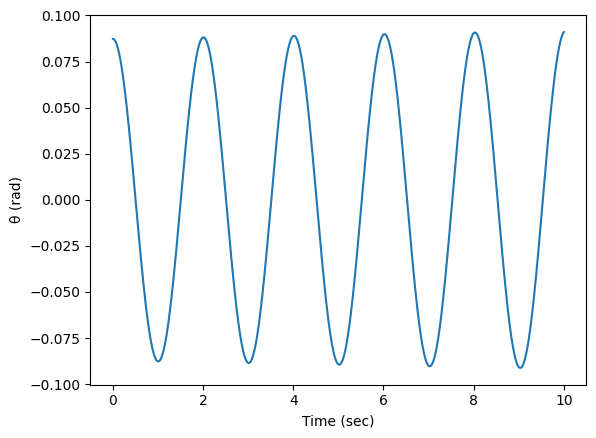

PyObject Text(24.0, 0.5, 'θ (rad)')

In [11]:
plot(thist,xtraj[1,:])
xlabel("Time (sec)")
ylabel("θ (rad)")

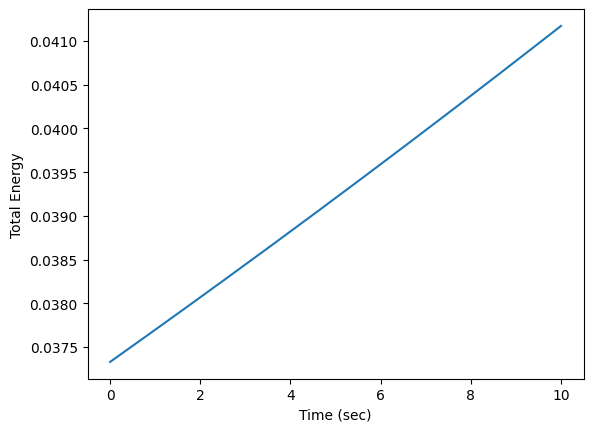

PyObject Text(24.0, 0.5, 'Total Energy')

In [12]:
#Let's plot the total energy of the system
Ehist = 0.5*m*ℓ^2*(xtraj[2,:].^2) .+ m*g*ℓ*(1.0.-cos.(xtraj[1,:]))

plot(thist,Ehist)
xlabel("Time (sec)")
ylabel("Total Energy")